IMPORTING MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('/kaggle/input/house-prices-2023-dataset/Cleaned_data_for_model.csv')

In [3]:
data

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...,...
99494,168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  int64  
 6   purpose        99499 non-null  object 
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.8+ MB


In [5]:
X_data = data.drop(['price','location'], axis = 1)
Y_data = data['price']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2)

In [7]:
train_data = x_train.join(y_train)

In [8]:
train_data

,Unnamed: 0,property_type,city,baths,purpose,bedrooms,Area_in_Marla,price
11587,16908,House,Rawalpindi,5,For Sale,4,5.0,9000000
36010,54192,Lower Portion,Islamabad,3,For Rent,3,14.2,70000
17491,25169,House,Faisalabad,5,For Sale,4,5.0,8800000
37099,55880,Flat,Karachi,3,For Sale,3,8.0,18000000
71641,114390,Upper Portion,Islamabad,2,For Rent,2,7.0,18000
...,...,...,...,...,...,...,...,...
22056,33128,House,Islamabad,6,For Sale,5,5.3,12200000
44839,67749,Upper Portion,Islamabad,3,For Rent,3,14.2,65000
91202,151920,House,Lahore,6,For Sale,5,10.0,23000000
31300,46832,House,Rawalpindi,4,For Rent,3,5.0,32000


In [9]:
train_data.purpose.value_counts()

purpose
For Sale    56737
For Rent    22862
Name: count, dtype: int64

In [10]:
train_data = train_data.join(pd.get_dummies(train_data.purpose)).drop(['purpose'], axis = 1)

In [11]:
train_data = train_data.join(pd.get_dummies(train_data.property_type)).drop(['property_type'], axis = 1)

In [12]:
train_data = train_data.join(pd.get_dummies(train_data.city)).drop(['city'], axis = 1)

In [13]:
train_data

,Unnamed: 0,baths,bedrooms,Area_in_Marla,price,For Rent,For Sale,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion,Faisalabad,Islamabad,Karachi,Lahore,Rawalpindi
11587,16908,5,4,5.0,9000000,False,True,False,False,True,False,False,False,False,False,False,False,False,True
36010,54192,3,3,14.2,70000,True,False,False,False,False,True,False,False,False,False,True,False,False,False
17491,25169,5,4,5.0,8800000,False,True,False,False,True,False,False,False,False,True,False,False,False,False
37099,55880,3,3,8.0,18000000,False,True,False,True,False,False,False,False,False,False,False,True,False,False
71641,114390,2,2,7.0,18000,True,False,False,False,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22056,33128,6,5,5.3,12200000,False,True,False,False,True,False,False,False,False,False,True,False,False,False
44839,67749,3,3,14.2,65000,True,False,False,False,False,False,False,False,True,False,True,False,False,False
91202,151920,6,5,10.0,23000000,False,True,False,False,True,False,False,False,False,False,False,False,True,False
31300,46832,4,3,5.0,32000,True,False,False,False,True,False,False,False,False,False,False,False,False,True


In [14]:
train_data['price'] = np.log(train_data['price']+1)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'baths'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'Area_in_Marla'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

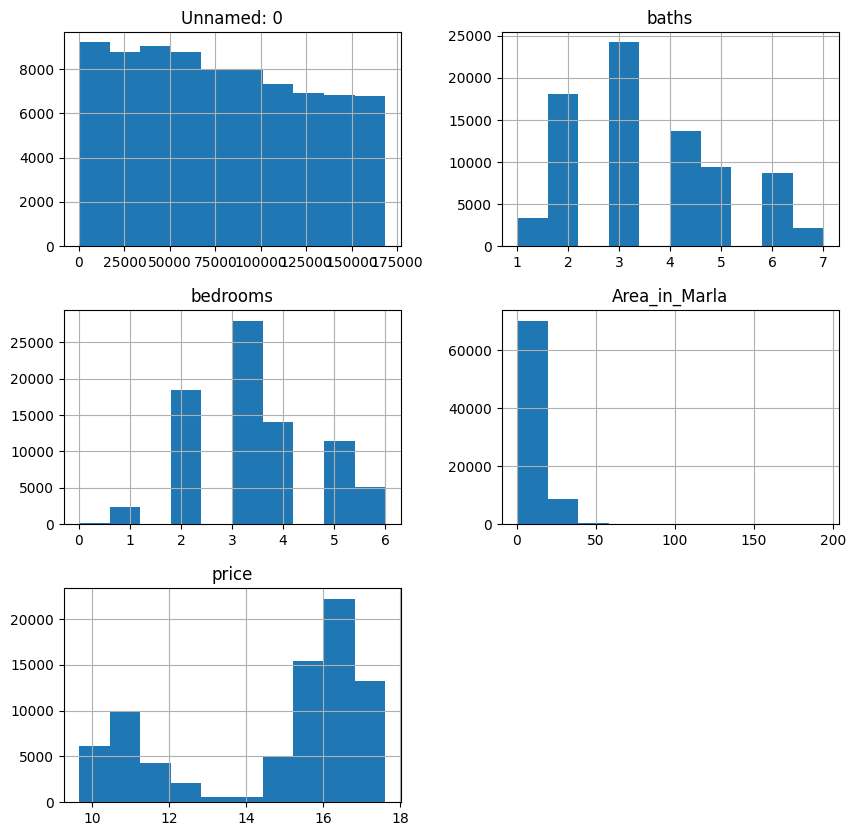

In [15]:

train_data.hist(figsize = (10,10))

<Axes: >

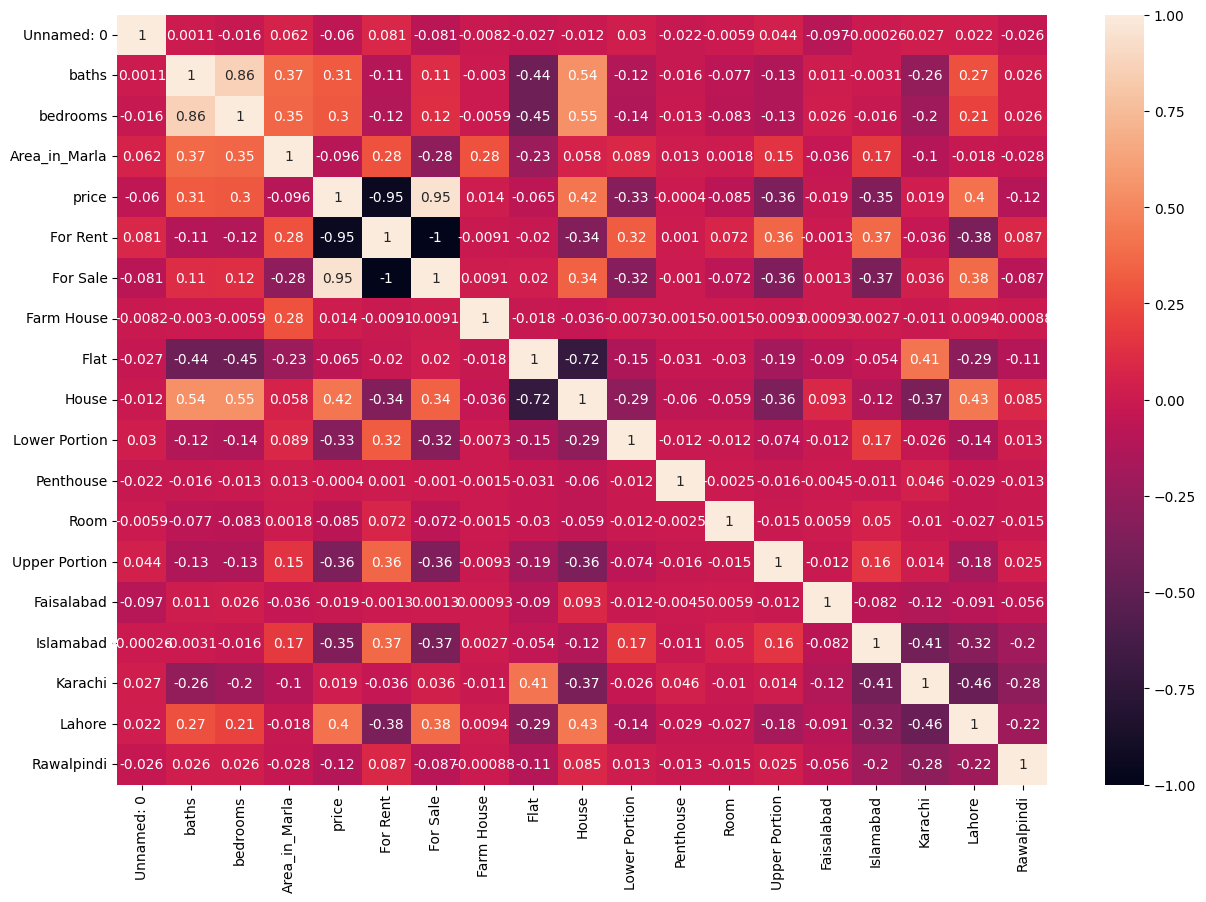

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(train_data.corr(), annot = True)

In [17]:
x_train, y_train = train_data.drop(['price'], axis = 1), train_data['price']

In [18]:
x_train

,Unnamed: 0,baths,bedrooms,Area_in_Marla,For Rent,For Sale,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion,Faisalabad,Islamabad,Karachi,Lahore,Rawalpindi
11587,16908,5,4,5.0,False,True,False,False,True,False,False,False,False,False,False,False,False,True
36010,54192,3,3,14.2,True,False,False,False,False,True,False,False,False,False,True,False,False,False
17491,25169,5,4,5.0,False,True,False,False,True,False,False,False,False,True,False,False,False,False
37099,55880,3,3,8.0,False,True,False,True,False,False,False,False,False,False,False,True,False,False
71641,114390,2,2,7.0,True,False,False,False,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22056,33128,6,5,5.3,False,True,False,False,True,False,False,False,False,False,True,False,False,False
44839,67749,3,3,14.2,True,False,False,False,False,False,False,False,True,False,True,False,False,False
91202,151920,6,5,10.0,False,True,False,False,True,False,False,False,False,False,False,False,True,False
31300,46832,4,3,5.0,True,False,False,False,True,False,False,False,False,False,False,False,False,True


In [19]:
test_data = x_test.join(y_test)
test_data = test_data.join(pd.get_dummies(test_data.purpose)).drop(['purpose'], axis = 1)
test_data = test_data.join(pd.get_dummies(test_data.property_type)).drop(['property_type'], axis = 1)
test_data = test_data.join(pd.get_dummies(test_data.city)).drop(['city'], axis = 1)
test_data['price'] = np.log(train_data['price']+1)
x_test, y_test = test_data.drop(['price'], axis = 1), test_data['price']

In [20]:
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [21]:
import tensorflow as tf

In [22]:
model = tf.keras.Sequential([tf.keras.layers.Dense(4096, input_dim = (x_train.shape[1]), activation = 'relu'),
                             tf.keras.layers.Dense(2048, activation = 'relu'),
                             tf.keras.layers.Dense(1024, activation = 'relu'),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                             tf.keras.layers.Dense(128, activation = 'relu'),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Dense(64, activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(4, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'linear')
                            ])

In [23]:
model.compile(optimizer = "adam", loss = "MSE")

In [24]:
model.fit(x_train,y_train, epochs = 25)

Epoch 1/25
2488/2488 [==============================] - 17s 5ms/step - loss: 5711.4219
Epoch 2/25
2488/2488 [==============================] - 13s 5ms/step - loss: 66.2658
Epoch 3/25
2488/2488 [==============================] - 13s 5ms/step - loss: 31.8129
Epoch 4/25
2488/2488 [==============================] - 13s 5ms/step - loss: 13.4062
Epoch 5/25
2488/2488 [==============================] - 12s 5ms/step - loss: 7.5066
Epoch 6/25
2488/2488 [==============================] - 12s 5ms/step - loss: 8.7561
Epoch 7/25
2488/2488 [==============================] - 13s 5ms/step - loss: 6.4150
Epoch 8/25
2488/2488 [==============================] - 12s 5ms/step - loss: 6.5402
Epoch 9/25
2488/2488 [==============================] - 13s 5ms/step - loss: 6.3214
Epoch 10/25
2488/2488 [==============================] - 12s 5ms/step - loss: 6.3101
Epoch 11/25
2488/2488 [==============================] - 12s 5ms/step - loss: 6.3108
Epoch 12/25
2488/2488 [==============================] - 13s 5ms/ste

In [27]:
print(model.predict(x_test[:1]))

1/1 [==============================] - 0s 19ms/step
[[14.793278]]
